In [90]:
A=[[1,2,3],[4,5,6]]
B=[[7,8,9],[10,11,12]]
A.extend(B)
A

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

In [96]:
A=np.array([[1,2,3],[4,5,6]])
B=np.array([[7,8,9],[10,11,12]])
np.append(A,B,axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

# Entrenamiento de EDO
Resolver:

$\dot \rho_i + 3(1+\gamma)H\rho_i = 0$

$H^2 = \frac{\kappa_0}{3}\sum \rho_i$

Cambiando variables, a:

$\Omega_i = \frac{\kappa_0 }{3H^2} \rho_i$ 

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers

# 1. Transformamos la EDO en una función

In [70]:
def RHS(Omega_i, lna, gamma=0):
    #x, y, z, H = Omega_i
    x, y, z = Omega_i
    pi = 3*x + 4*y
    #return [x*(-3 + pi), y*(-4 + pi), z*pi, -0.5*H*pi]
    return [x*(-3 + pi), y*(-4 + pi), z*pi]

def EDO(t,Om):
    #t,Or,Om,Ol=X
    Or=0.0001
    Ol=1-Or-Om
    H0 = 70.
    y0 = [Om, Or, Ol]
    result = odeint(RHS, y0, t)
    return result

def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val

# 2. Gneramos el conjunto de datos 
Con las suficientes convinaciones de $\Omega _i$ como para que el algrtimo aprenda
Vamos a variar 



$O_m \in [0.1, 0.5]$


$t \in [0,-12]$

In [268]:
O_m=np.linspace(0.1,0.5,1000)
t=np.linspace(0,-12,1000)

In [269]:
Y0=[]
for i in O_m:
    Om=0.3
    Y0.extend(EDO(t,Om))
Y0=np.array(Y0)

X0=[]
for Om in O_m:
    for T in t:
        X0.append([T,Om])
X0=np.array(X0)

# Creamos la Red Neuronal que trabajará estos datos


Epoch 1/30
200000/200000 [==============================] - 142s 707us/step - loss: 0.0021 - val_loss: 1.7522e-05
Epoch 2/30
200000/200000 [==============================] - 135s 673us/step - loss: 3.5651e-05 - val_loss: 9.2939e-05
Epoch 3/30
200000/200000 [==============================] - 131s 655us/step - loss: 3.1432e-05 - val_loss: 2.8423e-05
Epoch 4/30
200000/200000 [==============================] - 127s 637us/step - loss: 2.9072e-05 - val_loss: 2.1495e-05
Epoch 5/30
200000/200000 [==============================] - 134s 668us/step - loss: 2.4520e-05 - val_loss: 2.7885e-06
Epoch 6/30
200000/200000 [==============================] - 128s 641us/step - loss: 1.3795e-05 - val_loss: 1.2769e-05
Epoch 7/30
200000/200000 [==============================] - 127s 634us/step - loss: 1.2898e-05 - val_loss: 7.3491e-06
Epoch 8/30
200000/200000 [==============================] - 129s 646us/step - loss: 1.2634e-05 - val_loss: 1.1974e-06
Epoch 9/30
200000/200000 [==============================] - 

Text(0.5, 1.0, 'Error durante el entrenamiento')

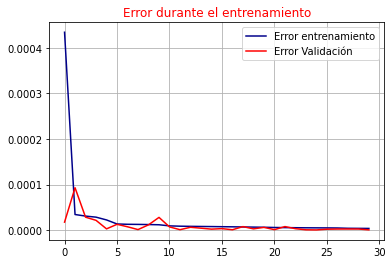

In [271]:
#Dos paredes ocultas


nodos=100
split_size=0.8
learning_rate=0.001
epocas=30

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X0,Y0,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(2,),use_bias=1,activation='sigmoid')
capa2=layers.Dense(nodos,use_bias=1,activation='sigmoid')

#para la capa de salida usamos Id como activación
salida=layers.Dense(3,use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(capa2)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=4,epochs=epocas,shuffle=True)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

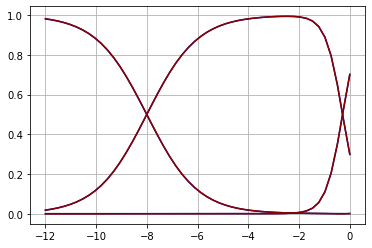

In [279]:
Z=np.linspace(0,-12,50)
dom=[]
for z in Z: dom.append([z,0.3]) 
A=model.predict(dom)
plt.plot(Z,EDO(Z, 0.3),color='darkblue')
plt.plot(Z,A,color='darkred')
plt.grid()

In [214]:
model.predict([[1,0.8]])

array([[ 0.7925686 , -0.00420911,  0.20487961]], dtype=float32)

In [9]:
Om = 0.3
t=[-11.75510204]
EDO(t,Om)

array([[3.000e-01, 1.000e-04, 6.999e-01]])

In [10]:
model.predict([[-11.75510204,Om]])

array([[ 0.3097651, -0.0057868,  0.6901343]], dtype=float32)

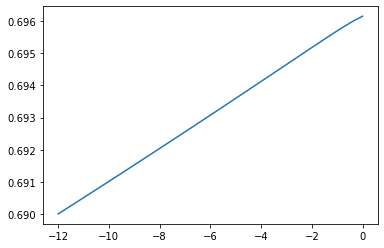

In [11]:
w=np.linspace(0,-12)
B=[[w, Om]]
#model.predict(B)
plt.plot(Z,A[:,2])
#plt.plot(Z,EDO(Z,0.3)[:,1])

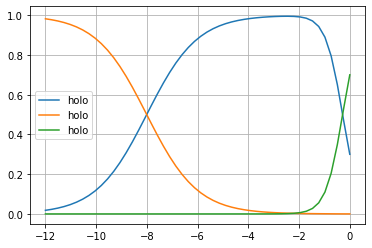

In [12]:
t=np.linspace(0,-12)
X=[]
Or = 0.0001
Om = 0.3
Ol = 1. - Or - Om
plt.plot(t,EDO(t, Om),label='holo')
#plt.plot(t, model.predict(t, 0.0001,0.3, Ol))
plt.grid()
plt.legend()

In [13]:
EDO(t,Om)-model.predict(B)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {"<class \'float\'>", "<class \'numpy.ndarray\'>"})'}), <class 'NoneType'>

In [19]:
t

array([  0.        ,  -0.24489796,  -0.48979592,  -0.73469388,
        -0.97959184,  -1.2244898 ,  -1.46938776,  -1.71428571,
        -1.95918367,  -2.20408163,  -2.44897959,  -2.69387755,
        -2.93877551,  -3.18367347,  -3.42857143,  -3.67346939,
        -3.91836735,  -4.16326531,  -4.40816327,  -4.65306122,
        -4.89795918,  -5.14285714,  -5.3877551 ,  -5.63265306,
        -5.87755102,  -6.12244898,  -6.36734694,  -6.6122449 ,
        -6.85714286,  -7.10204082,  -7.34693878,  -7.59183673,
        -7.83673469,  -8.08163265,  -8.32653061,  -8.57142857,
        -8.81632653,  -9.06122449,  -9.30612245,  -9.55102041,
        -9.79591837, -10.04081633, -10.28571429, -10.53061224,
       -10.7755102 , -11.02040816, -11.26530612, -11.51020408,
       -11.75510204, -12.        ])

In [57]:
lista=[]
t=np.linspace(0,-12)
for i in np.linspace(0.1,0.9,10):
    lista.append(EDO(t,i))
lista
lista=np.array(lista)
lista=lista.reshape(500,3)
lista

array([[ 1.00000000e-01,  1.00000000e-04,  8.99900000e-01],
       [ 1.88052355e-01,  2.40235272e-04,  8.11707410e-01],
       [ 3.25521037e-01,  5.31244877e-04,  6.73947718e-01],
       ...,
       [ 8.27744987e-02,  9.17225501e-01,  2.99829402e-11],
       [ 6.59809206e-02,  9.34019079e-01, -4.68389117e-11],
       [ 5.23998485e-02,  9.47600151e-01,  2.14346210e-10]])

In [35]:
EDO(t,0.1)

array([[1.000e-01, 1.000e-04, 8.999e-01]])

In [20]:
EDO([-11.75510204],0.3)


array([[3.000e-01, 1.000e-04, 6.999e-01]])

In [ ]:
#model.predict([[-12,Om]])[:,1]
A

In [ ]:
6.999e-01